# Seattle Seahawks Analysis

This is meant to be a proof of concept analysis of the Seattle Seahawks and Russel Wilson. Using pyffl, I will load all of the Seahawk's games since 2013 and plot their score vs their opponents scores.

In [46]:
# Loading default settings

%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

df = pandas.read_csv('../data/players.csv')
df["score_diff"] = df["own_score"] - df["opp_score"]
df["is_home"] = df.apply(lambda row: 1 if row["home"] ==  row["team"] else 0, axis=1)

The graph below represents all games since 2013. The X axis represents the Seahawk's score and the Y axis represents their opponent's score. Comparing the seahawks to other teams in the NFL, I found that their scores were highly variable. Interestingly enough, that the densest porition of the graph hovers around the 10-20 point mark.

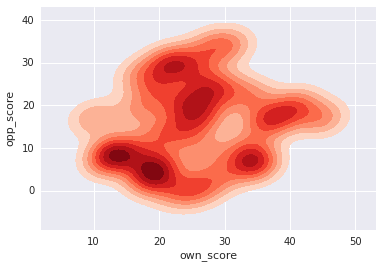

In [39]:
team = df[df["team"] == "SEA"]
ax = sns.kdeplot(team["own_score"], team["opp_score"],
                 cmap="Reds", shade=True, shade_lowest=False)

### Lets take a look at how the Seahawks perform at home and away from home

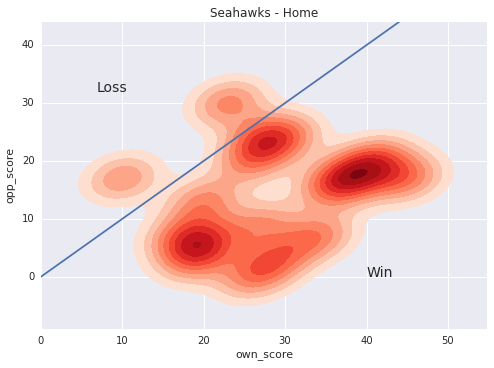

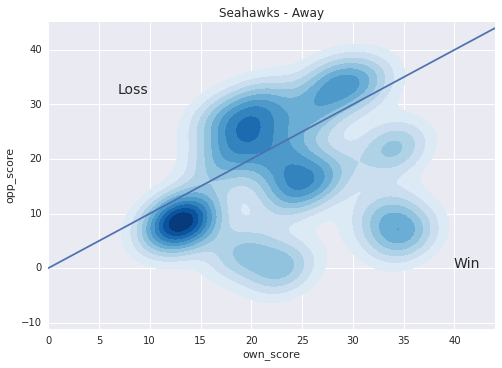

In [84]:
seattle_home = team[team["is_home"] == 1]
seattle_away = team[team["is_home"] == 0]

chart1, ax1 = plt.subplots()
t = np.arange(max(seattle_home["own_score"]))
s = t

plt.plot(t, s)

ax1.set_title("Seahawks - Home")
ax1.text(7, 32, r'Loss', fontsize=14)
ax1.text(40, 0, r'Win', fontsize=14)

sns.kdeplot(seattle_home["own_score"], seattle_home["opp_score"],
                 cmap="Reds", shade=True, shade_lowest=False, ax=ax1)


chart2, ax2 = plt.subplots()
t = np.arange(max(seattle_away["own_score"]) + 10)
s = t

plt.plot(t, s)

ax2.set_title("Seahawks - Away")
ax2.text(7, 32, r'Loss', fontsize=14)
ax2.text(40, 0, r'Win', fontsize=14)
sns.kdeplot(seattle_away["own_score"], seattle_away["opp_score"],
                 cmap="Blues", shade=True, shade_lowest=False, ax=ax2)

### So it's obvious the Seahawk's do better at home. What about Russel Wilson and his effect on the game?

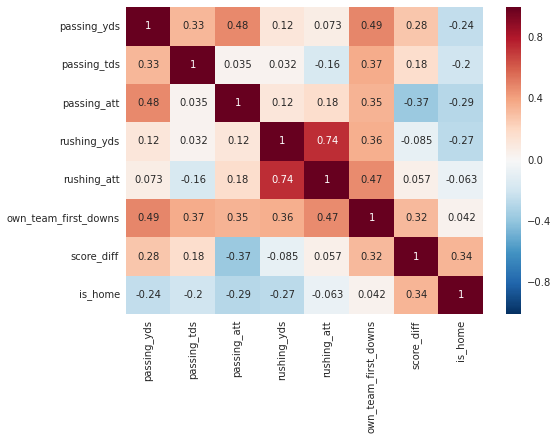

In [82]:
russel_wilson = df[(df["name"] == "R.Wilson") & (df["team"] == "SEA")]
sns.set(color_codes=True)
rw_stats = russel_wilson[["passing_yds", "passing_tds", "passing_att","rushing_yds", "rushing_att", "own_team_first_downs", "score_diff", "is_home"]].fillna(0)

rw_stats_corr = rw_stats.corr()

g = sns.heatmap(rw_stats_corr, annot=True)

In [ ]:
### I'll leave the analysis of the correlations up to you (+ numbers mean the two things are positively correlated)